# Multi-armed Bandit

O problema do bandido multi-armado (ou MAB) pode ser visto como um conjunto de distribuições reais associada às recompensas entregues por um dos $K \in \mathbb{N}^+$ braços: $B = \{ R_{1}, \dots, R_{K}\}$, onde $\{\mu_{1}, \dots, \mu_{K}\}$ são os valores médios associados a essas distribuições de recompensas.  
O jogador seleciona iterativamente uma alavanca por rodada e observa a recompensa associada.  
O objetivo é maximizar a soma das recompensas coletadas.


Este notebook utiliza a política $\epsilon$-greedy para selecionar a melhor alavanca.

## Autor: h3dema

In [43]:
%matplotlib inline

# imports
from random import randint
import numpy as np
import matplotlib.pyplot as plt

from util import return_normal
from policies import e_greedy

In [44]:
# parametros de execução
K = 3  # braços
T = 1000  # numero de iterações

n = 3  # numero de iterações para montar a estimativa inicial das médias

In [45]:
# medias e variancias dos braços
arm_means = [1.3, 2.27, 2.7]
arm_variances = [0.01, 0.1, 1]

# baseado na distribuição normal, obtem as recompensas em cada braço
rewards = [return_normal(T + n, arm_means[i], variance=arm_variances[i]) for i in range(K)]

# usa os primeiros valores para calcular a estimativa inicial das médias para cada braço
means_k = [np.mean(means[i][:n]) for i in range(K)]
# mantem somente as T recompensas seguintes
means[i] = means[i][n:]

In [49]:
# mostra média real do melhor braço: que sabemos ser o 2
best_arm = means.index(max(means))
real_avg = np.mean(means[best_arm])
print "média do braço %d: %7.5f" % (best_arm, real_avg)

média do braço 2: 2.72060


In [50]:
# simple MAB algorithm
def run(K, T, rewards, method, verbose=False, **kwargs):
    """
    return: 
        selected_arm:
            lista com os braços selecionados a cada instante
        r:
            recompensa obtida para cada seleção
    """
    num_selected_arm = [1 for i in range(K)]
    r = [-1 for i in range(T)]
    for i in range(T):
        arm = method.select_arm(means_k)

        r_t = rewards[arm][i]
        r[i] = r_t

        # update mean
        means_k[arm] = num_selected_arm[arm] * means_k[arm] + r_t
        num_selected_arm[arm] += 1
        means_k[arm] /= num_selected_arm[arm]
        if verbose:
            print 'round', i, 'best_arm', arm, 'reward', r_t

    return method.selected_arm, r

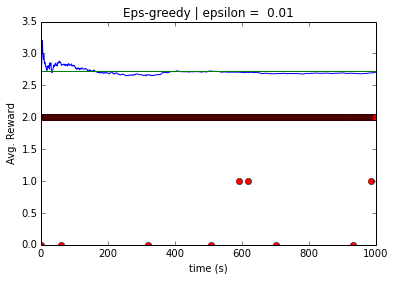

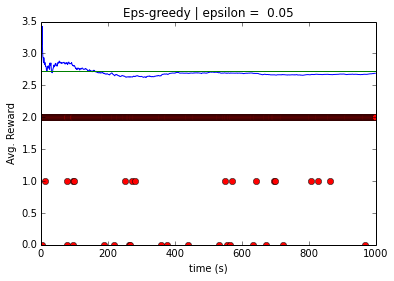

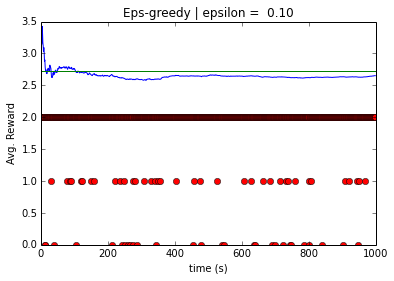

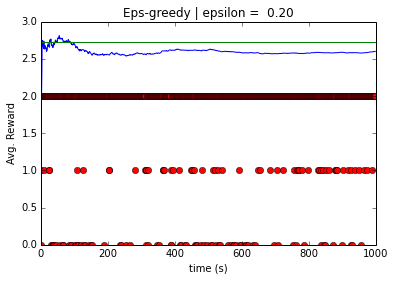

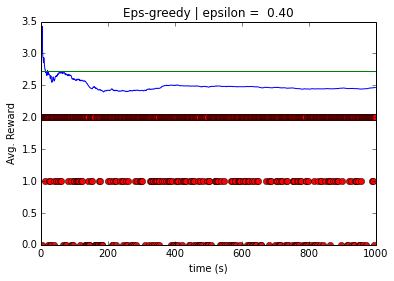

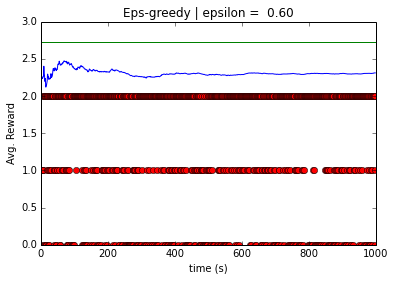

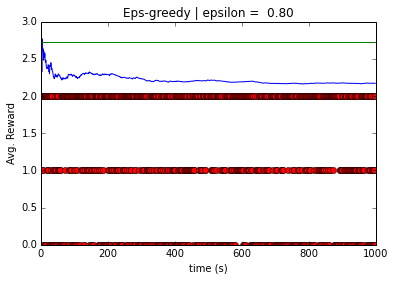

In [51]:
fig = 1
for epsilon in [0.01, 0.05, 0.1, 0.2, 0.4, 0.6, 0.8]:
    selected_arm, r = run(K, T, 
                          method=e_greedy(K, epsilon=epsilon),
                          rewards=rewards,
                          means_k=means_k)
    r_mean = [np.mean(r[:i + 1]) for i in range(T)]
    plt.figure(fig)
    X = [i for i in range(T)]
    plt.plot(X, r_mean, X, selected_arm, 'ro')
    plt.plot([0, T], [real_avg, real_avg])
    plt.ylabel('Recompensa média')
    plt.xlabel('Tempo (s)')
    y_max = 0.9 * max(r_mean)
    plt.title('Eps-greedy | epsilon = %5.2f' % (epsilon))
    fig += 1
